# TP 1 : Équation de Transport (MATLAB)

Le but de ce TP est la résolution numérique par différents
schémas aux différences sur grille uniforme de l'équation de
transport :
\begin{equation}
\begin{cases}
\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0
\quad x \in [-\pi,\pi], t\in I\!\!R,\\
u(x,0)=u_0(x)\\
u(.,t) \quad 2\pi\text{-périodique}
\end{cases} \quad \quad(1)
\end{equation}


Pour la suite on fixe $a=1$ et l'intervalle de temps de notre étude
$[0,T]$ avec $T=8$. On note $k$ le pas de temps, $n$ l'indice
au temps $t_n$, $h$ le pas en espace et $m$ l'indice au point $x_m$.

Pour les différents tests on prendra les 2 conditions initiales :
\begin{equation*}
u_0^1(x)=
\begin{cases}
e^{\frac{1}{x^2-1}} &\text{si } |x| < 1\\
0 &\text{sinon}
\end{cases}
\quad\text{et}\quad
u_0^2(x)=
\begin{cases}
1-|x| &\text{si } |x| < 1\\
0 &\text{sinon}
\end{cases}
\end{equation*}



In [1]:
%%file u01.m
function out=u01(x)
    % 2\pi périodic
    %n=int((x+pi)/(2*pi))
    %x=x-n*2*pi
    if abs(x)<1
         out=exp(1/(x^2-1));
    else
         out=0;
    end
end

Created file '/home/clope/A - M2 SITN 2015-16/u01.m'.


In [2]:
%%file u02.m
function out=u02(x)
    % 2\pi périodic
    %n=int((x+pi)/(2*pi))
    %x=x-n*2*pi
    if abs(x)<1
         out=1-abs(x);
    else
         out=0;
    end
end

Created file '/home/clope/A - M2 SITN 2015-16/u02.m'.


### Donner les solution exactes du problème (1).

### Implémenter les schémas suivants. 

Il s'agit
de schémas à un pas, il est possible d'utiliser une représentation
matricielle commune de la forme $AU_{n+1}=BU_n$, avec $A$ et $B$ matrices et
$U_n$ solution discrête au temps $t_n$.



Obtenir une animation avec la supperposition de la solution exacte et
solution calculée pour chaque cas.

Donner l'ordre des schémas, ainsi que les conditions de stabilité. Calculer et représenter le symboles de chaque schéma (voir cours), illustrer vos calcul par des choix judicieux de simulations et de
courbes.

In [3]:
%plot  -s 1600,800

In [4]:
% Paramètres de simulation
% espace
N=100;
h=2*pi/N;
x=linspace(-pi,pi,N+1)';
% temps
M=10;
k=0.8*h;
disp(k/h)

0.8000

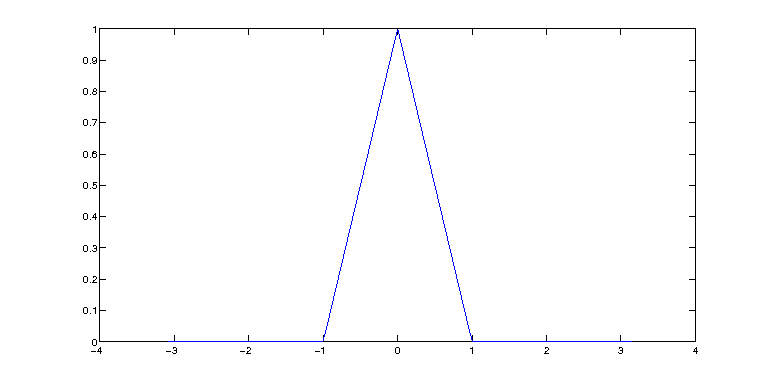

In [5]:
% initiailsation
U0=zeros(N,1);
for i=1:N
U0(i)=u02(x(i+1));
end
plot(x(2:end),U0);

## Schéma de Courant

\begin{equation}
\begin{cases}
\frac{1}{k}(u_m^{n+1}-u_m^{n})+\frac{a}{h}(u_m^{n}-u_{m-1}^{n})=0\\
u^0_m=u_0(x_m)
\end{cases}
\end{equation}

In [6]:
A = sparse([],[],[],N,N,0);
for i=1:N
    A(i,i)=1-k/h;
end
for i=2:N
    A(i,i-1)=k/h;
end
A(1,N)=k/h;

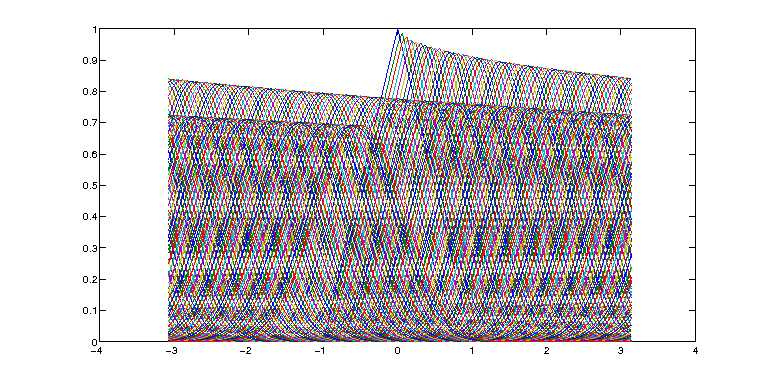

In [7]:
M=U0;
U=U0;
for n=1:240
    U=A*U;
    M=[M,U];
end
plot(x(2:end),M)

## Schéma de Lax

\begin{equation}
\begin{cases}
\frac{1}{k}(u_m^{n+1}-\frac{1}{2}(u_{m+1}^{n}+u_{m-1}^{n}))
+\frac{a}{2h}(u_{m+1}^{n}-u_{m-1}^{n})=0\\
u^0_m=u_0(x_m)
\end{cases}
\end{equation}

In [8]:
A = sparse([],[],[],N,N,0);
for i=2:N
    A(i,i-1)=1/2+k/h/2;
end
for i=1:N-1
    A(i,i+1)=1/2-k/h/2;
end
A(1,N)=1/2+k/h/2;
A(N,1)=1/2-k/h/2;

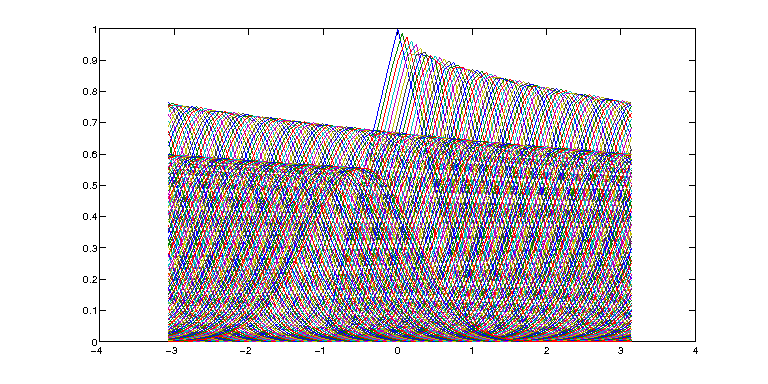

In [9]:
M=U0;
U=U0;
for n=1:240
    U=A*U;
    M=[M,U];
end
plot(x(2:end),M)

## Schéma de Lax Wendroff

\begin{equation}
\begin{cases}
\frac{1}{k}(u_m^{n+1}-u_m^{n}) + 
\frac{a}{2h}(u_{m+1}^{n}-u_{m-1}^{n})
-\frac{a^2 k}{2h^2}(u_{m+1}^{n}-2u_m^{n}+u_{m-1}^{n})=0\\
u^0_m=u_0(x_m)
\end{cases}
\end{equation}

In [10]:
A = sparse([],[],[],N,N,0);
for i=1:N
    A(i,i)=1-(k/h)^2;
end
for i=2:N
    A(i,i-1)=k/h/2+((k/h)^2)/2;
end
for i=1:N-1
    A(i,i+1)=-k/h/2+((k/h)^2)/2;
end
A(1,N)=k/h/2+((k/h)^2)/2;
A(N,1)=-k/h/2+((k/h)^2)/2;

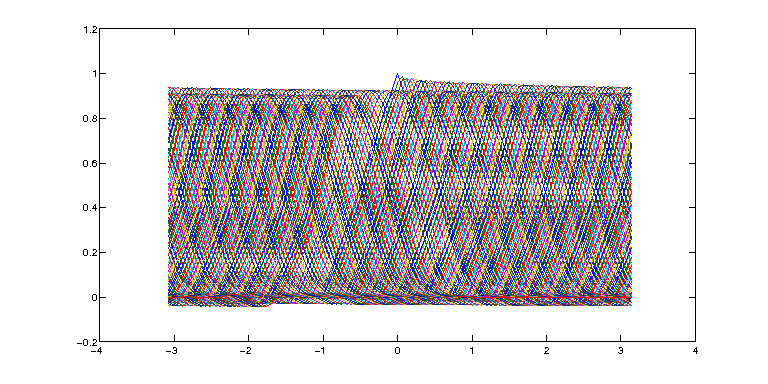

In [11]:
M=U0;
U=U0;
for n=1:240
    U=A*U;
    M=[M,U];
end
plot(x(2:end),M)

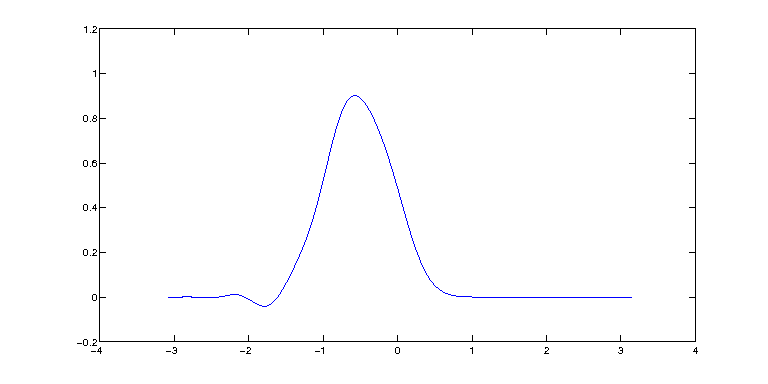

In [12]:
plot(x(2:end),U)

## Schéma de Thomé (Box-Sheme)

\begin{equation}
\begin{cases}
\frac{1}{k}(u_m^{n+1}+u_{m+1}^{n+1}-u_m^{n}-u_{m+1}^{n})+
\frac{a}{h}(u_{m+1}^{n+1}+u_{m+1}^{n}-u_{m}^{n+1}-u_{m}^{n})=0\\
u^0_m=u_0(x_m)
\end{cases}
\end{equation}

In [12]:
A = sparse([],[],[],N,N,0);
for i=1:N
    A(i,i)=1-(k/h)^2;
end
for i=2:N
    A(i,i-1)=k/h/2+((k/h)^2)/2;
end
for i=1:N-1
    A(i,i+1)=-k/h/2+((k/h)^2)/2;
end
A(1,N)=k/h/2+((k/h)^2)/2;
A(N,1)=-k/h/2+((k/h)^2)/2;

ans =

    0.8000

In [ ]:
U

In [ ]:

plot(1:10,1:10)

In [ ]:
? spzeros

In [ ]:
M=U0;
U=U0;

In [ ]:
M=[M,U]